# Norm Values that get closer to 1 - Calculate the Loss 

In [1]:
import argparse
import math
import os
import time
import random
from pylab import *
style.use('default')

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D   

import numpy as np
import torch
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter
import torch.utils

In [126]:
d = 2
t = torch.distributions.uniform.Uniform(-1,1).sample([d]) 
tn = torch.nn.functional.normalize(t, dim = -1)
dims = 10
r = torch.arange(0,(dims+1),1)
tensors = []
for i in r:
    tns = tn * i / 10
    print('norm', torch.norm(tns))
    tensors.append(tns)

norm tensor(0.)
norm tensor(0.1000)
norm tensor(0.2000)
norm tensor(0.3000)
norm tensor(0.4000)
norm tensor(0.5000)
norm tensor(0.6000)
norm tensor(0.7000)
norm tensor(0.8000)
norm tensor(0.9000)
norm tensor(1.0000)


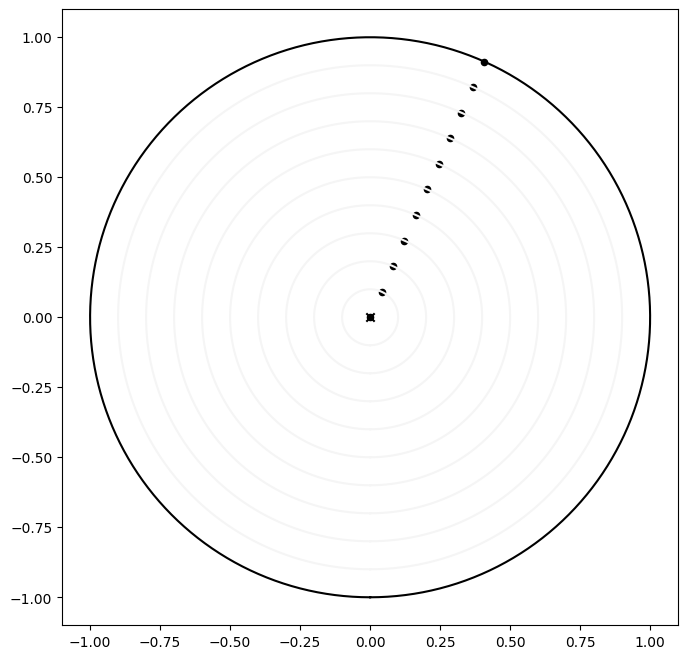

In [127]:
x = [i[0] for i in tensors]
y = [i[1] for i in tensors]


fig1 = plt.figure(figsize=(15,8))
ax = plt.axes()

ax.set_aspect(1)
theta = np.linspace(-np.pi, np.pi, 200)
plt.plot(np.sin(theta), np.cos(theta), c = 'black')
for i in np.arange(0,10,1):
    plt.plot(np.sin(theta)*i/10, np.cos(theta)*i/10,color = 'whitesmoke')

plt.scatter(x, y, s= 20, color = 'black')
plt.scatter(0,0, color = 'black', marker = 'x')

# Now as a function:

In [128]:
def fixed_norm_tensors(d = 2, ordered = True):

    if ordered:
        t = torch.distributions.uniform.Uniform(-1,1).sample([d]) 
        tn = torch.nn.functional.normalize(t, dim = -1)
    else:
        t = [torch.distributions.uniform.Uniform(-1,1).sample([d]) for i in torch.arange(11)]
        tn = [torch.nn.functional.normalize(t[i], dim = -1) for i in torch.arange(0,len(t))]
        
    divider = 10
    r = torch.arange(0,(divider+1),1)
    tensors = [] 
    if ordered:
        for i in r:
            tns = tn * i / 10
            # print('norm', torch.norm(tns))
            tensors.append(tns)
    else:
        for i in r:
            tns = tn[i] * i / 10
            # print('norm', torch.norm(tns))
            tensors.append(tns)

    return tensors

### Ordered Example

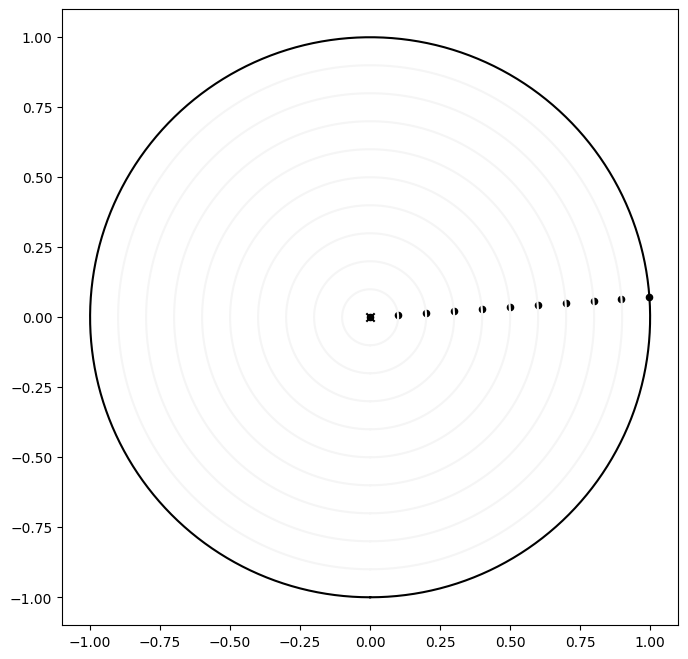

In [129]:
tensors = fixed_norm_tensors(d = 2, ordered = True)
x = [i[0] for i in tensors]
y = [i[1] for i in tensors]


fig1 = plt.figure(figsize=(15,8))
ax = plt.axes()

ax.set_aspect(1)
theta = np.linspace(-np.pi, np.pi, 200)
plt.plot(np.sin(theta), np.cos(theta), c = 'black')
for i in np.arange(0,10,1):
    plt.plot(np.sin(theta)*i/10, np.cos(theta)*i/10,color = 'whitesmoke')

plt.scatter(x, y, s= 20, color = 'black')
plt.scatter(0,0, color = 'black', marker = 'x')

#### Not Ordered Example

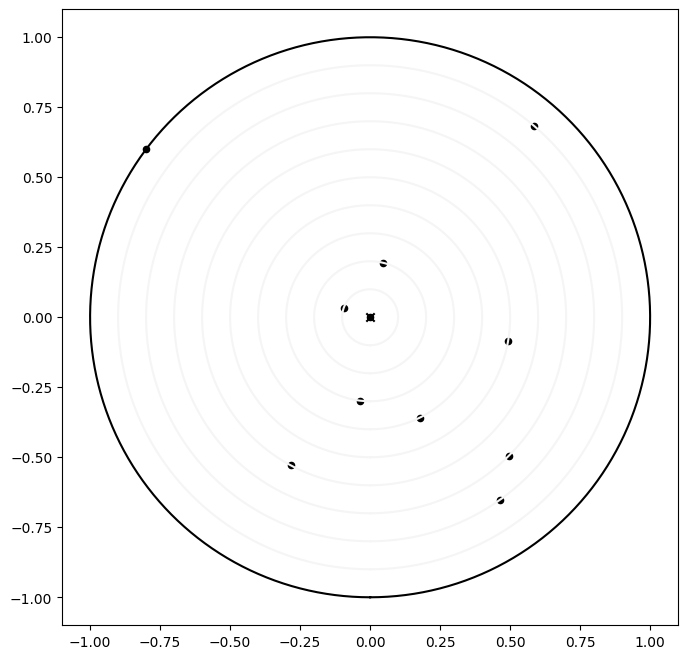

In [130]:
tensors = fixed_norm_tensors(d = 2, ordered = False)
x = [i[0] for i in tensors]
y = [i[1] for i in tensors]


fig1 = plt.figure(figsize=(15,8))
ax = plt.axes()

ax.set_aspect(1)
theta = np.linspace(-np.pi, np.pi, 200)
plt.plot(np.sin(theta), np.cos(theta), c = 'black')
for i in np.arange(0,10,1):
    plt.plot(np.sin(theta)*i/10, np.cos(theta)*i/10,color = 'whitesmoke')

plt.scatter(x, y, s= 20, color = 'black')
plt.scatter(0,0, color = 'black', marker = 'x')

# Exploration of Loss

In [131]:
from helper import pmath
from helper.helper import get_optimizer, load_dataset 
from helper.hyperbolicLoss import PeBusePenalty

f_loss = PeBusePenalty(10, penalty_option= 'dim', mult= 0.1)

proto_path = '/Users/dj/Documents/GitHub/Master_Thesis/Code/SynDat_HBL/prototypes/prototypes-2d-10c.npy'
protos = np.load(proto_path)

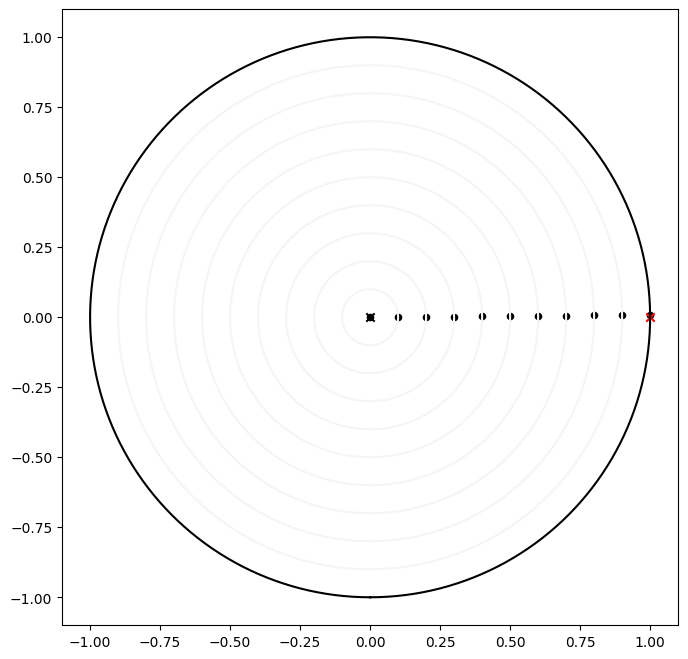

In [132]:
torch.manual_seed(200)
tensors = fixed_norm_tensors(d = 2, ordered = True)
x = [i[0] for i in tensors]
y = [i[1] for i in tensors]

fig1 = plt.figure(figsize=(15,8))
ax = plt.axes()

ax.set_aspect(1)
theta = np.linspace(-np.pi, np.pi, 200)
plt.plot(np.sin(theta), np.cos(theta), c = 'black')
for i in np.arange(0,10,1):
    plt.plot(np.sin(theta)*i/10, np.cos(theta)*i/10,color = 'whitesmoke')

plt.scatter(x, y, s= 20, color = 'black')
plt.scatter(0,0, color = 'black', marker = 'x')
plt.scatter(protos[0][0], protos[0][1], color = 'red', marker = 'x')

In [133]:
target_proto = 0
target_sample = 0
target = torch.tensor(protos[target_proto]).view(2,1)

for i in tensors:
    sample = i.view(2,1)
    print(sample.view(2),f_loss(sample, target).item())

tensor([0., 0.]) -inf
tensor([0.1000, 0.0008]) -6.508973771776027
tensor([0.2000, 0.0016]) -5.9028334103544084
tensor([0.3000, 0.0025]) -5.577405647813796
tensor([0.4000, 0.0033]) -5.363825058163145
tensor([0.5000, 0.0041]) -5.209666869024212
tensor([0.6000, 0.0049]) -5.091875339400726
tensor([0.7000, 0.0057]) -4.998339596349796
tensor([0.8000, 0.0066]) -4.92195626116342
tensor([0.9000, 0.0074]) -4.858230404709474
tensor([1.0000, 0.0082]) -4.818951177172331


In [134]:
target

tensor([[1.],
        [0.]], dtype=torch.float64)

# Now for 1000 classes

In [151]:
torch.manual_seed(200)
n = 1000
tensors = fixed_norm_tensors(d = n, ordered = True)

In [152]:
f_loss = PeBusePenalty(n, penalty_option= 'dim', mult= 0.1)

proto_path = '/Users/dj/Documents/GitHub/Master_Thesis/Code/SynDat_HBL/prototypes/prototypes-1000d-1000c.npy'
protos = np.load(proto_path)

In [154]:
target_proto = 0
target_sample = 0
target = torch.tensor(protos[target_proto]).view(n,1)

for i in tensors:
    sample = i.view(n,1)
    print(f_loss(sample, target).item())

61.12449645996094
61.16802978515625
61.221649169921875
61.22059631347656
61.288307189941406
61.451881408691406
61.57208251953125
61.669097900390625
61.7862663269043
61.896270751953125
62.03715896606445


In [ ]:
# I guess I have no idea where the tensors tensor is directed. Therefore, this does not make that much sense. 

In [309]:
test = torch.tensor([[729],
        [100],
        [181],
        [432],
        [369],
        [996],
        [181],
        [813],
        [165],
        [682],
        [813],
        [581],
        [126],
        [728],
        [873],
        [242],
        [840],
        [641],
        [388],
        [630],
        [ 21],
        [135],
        [630],
        [734],
        [942],
        [708],
        [641],
        [768],
        [165],
        [165],
        [768],
        [539],
        [242],
        [322],
        [607],
        [310],
        [402],
        [242],
        [352],
        [135],
        [750],
        [126],
        [548],
        [560],
        [165],
        [641],
        [620],
        [165],
        [322],
        [135],
        [839],
        [742]])

In [65]:
d = torch.tensor([0.95, 0.05]).view(len([0.5, 0.5]),1)
p = torch.tensor([1.0, 0.0]).view(len([0.5, 0.5]),1)

print(p-d)

tensor([[ 0.0500],
        [-0.0500]])


In [61]:
def buse_distance(p, g):
    data_norm = torch.norm(p, dim=1)
    print('data_norm', data_norm)
    denom = (1 - data_norm.pow(2) + 1e-6)
    print('denom', denom)

    prediction_difference = g - p
    print('prediction_difference', prediction_difference)

    numero = torch.norm(prediction_difference, dim=1)
    print('numero', numero)

    division = numero / denom
    print('division', division)

    one_loss = 2 * torch.log(division)
    print('one_loss', one_loss)
    total_loss = torch.mean(one_loss)
    print('total_loss', total_loss)

    return total_loss

In [66]:
buse_distance(d,p)

data_norm tensor([0.9500, 0.0500])
denom tensor([0.0975, 0.9975])
prediction_difference tensor([[ 0.0500],
        [-0.0500]])
numero tensor([0.0500, 0.0500])
division tensor([0.5128, 0.0501])
one_loss tensor([-1.3357, -5.9865])
total_loss tensor(-3.6611)


tensor(-3.6611)

In [91]:
from helper import pmath
d = torch.tensor([0.5, 0.5]).view(len([0.5, 0.5]),1)
ran = np.arange(-2,2,0.1)
for i in ran:
    d = torch.tensor([0.5, float(i)]).view(2,1)
    outputnorm = torch.norm(d, dim= -1)
    clipped_output = torch.multiply(torch.minimum(torch.tensor(1.0), (5.0 / outputnorm).view(-1, 1)), 1)
    output_exp_map = pmath.expmap0(clipped_output, c=1)
    print(i,':', output_exp_map[1])

-2.0 : tensor([0.7616])
-1.9 : tensor([0.7616])
-1.7999999999999998 : tensor([0.7616])
-1.6999999999999997 : tensor([0.7616])
-1.5999999999999996 : tensor([0.7616])
-1.4999999999999996 : tensor([0.7616])
-1.3999999999999995 : tensor([0.7616])
-1.2999999999999994 : tensor([0.7616])
-1.1999999999999993 : tensor([0.7616])
-1.0999999999999992 : tensor([0.7616])
-0.9999999999999991 : tensor([0.7616])
-0.899999999999999 : tensor([0.7616])
-0.7999999999999989 : tensor([0.7616])
-0.6999999999999988 : tensor([0.7616])
-0.5999999999999988 : tensor([0.7616])
-0.49999999999999867 : tensor([0.7616])
-0.3999999999999986 : tensor([0.7616])
-0.2999999999999985 : tensor([0.7616])
-0.1999999999999984 : tensor([0.7616])
-0.09999999999999831 : tensor([0.7616])
1.7763568394002505e-15 : tensor([0.7616])
0.10000000000000187 : tensor([0.7616])
0.20000000000000195 : tensor([0.7616])
0.30000000000000204 : tensor([0.7616])
0.40000000000000213 : tensor([0.7616])
0.5000000000000022 : tensor([0.7616])
0.60000000000

# New Attempt - Directed Tensor with fixed Prototype on x-axis

In [2]:
# rang = torch.arange(0,1.1,0.1)
# for idx, i in enumerate(rang):
#     vec = torch.zeros(11).view(11,1)
#     vec[idx] = i 
#     print(vec)

tensor([[0.9900],
        [0.0000]])
Target: tensor([0.3090, 0.9511], dtype=torch.float64)


/opt/anaconda3/envs/MasterThesis/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/MasterThesis/lib/python3.7/site-packages/numpy/ma/core.py:2830: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  order=order, subok=True, ndmin=ndmin)
/opt/anaconda3/envs/MasterThesis/lib/python3.7/site-packages/numpy/ma/core.py:2830: VisibleDeprecationWarning: Creating an ndarray from rag

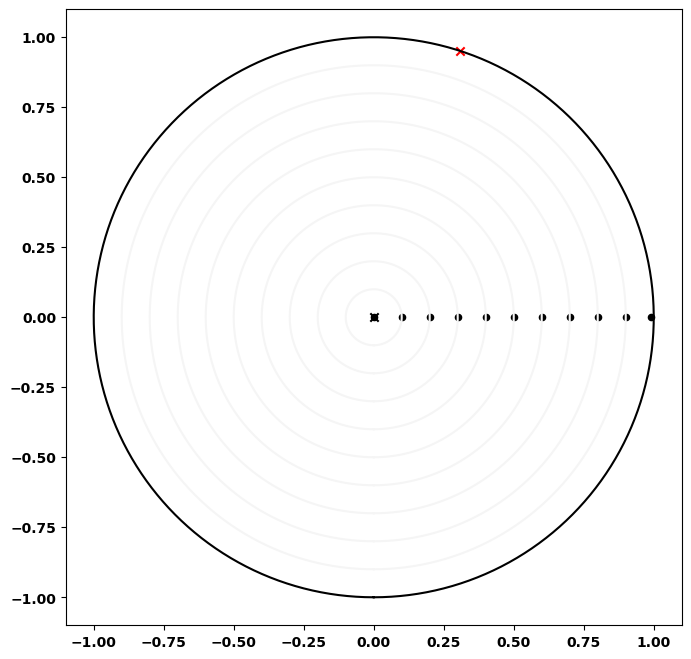

In [102]:
dims = 2

proto_path = '/Users/dj/Documents/GitHub/Master_Thesis/Code/SynDat_HBL/prototypes/prototypes-2d-10c.npy'
protos = np.load(proto_path)

r = torch.arange(0, 1.1 ,0.1)
x = []; y = []

for i in np.arange(0, len(r), 1): # Amount of samples

    # Data
    t = torch.zeros(dims).view(dims,1)
    t[0] = r[i]
    if i == 10:
        t[0] = t[0] - 0.01
        print(t)

    x.append(t[0])
    y.append(t[1])

# Prototype
target = torch.zeros(dims).view(dims,1)
target[0] = 1.0 #- 1e-6
# target += 1e-6 # otherwise, the only solution is -inf 
target = torch.tensor(target, dtype=torch.float64)

# Prototype from prototypes_learning.py
target = torch.tensor(protos[2])

# Plot
fig1 = plt.figure(figsize=(15,8))
ax = plt.axes()

ax.set_aspect(1)
theta = np.linspace(-np.pi, np.pi, 200)
plt.plot(np.sin(theta), np.cos(theta), c = 'black')
for i in np.arange(0,10,1):
    plt.plot(np.sin(theta)*i/10, np.cos(theta)*i/10,color = 'whitesmoke')

plt.scatter(x, y, s= 20, color = 'black')
plt.scatter(0,0, color = 'black', marker = 'x')
plt.scatter(target[0] , target[1], color = 'red', marker = 'x')
print('Target:', target.view(len(target)))

In [104]:
from helper import pmath
from helper.helper import get_optimizer, load_dataset 
from helper.hyperbolicLoss import PeBusePenalty

proto_path = '/Users/dj/Documents/GitHub/Master_Thesis/Code/SynDat_HBL/prototypes/prototypes-2d-10c.npy'
protos = np.load(proto_path)

dims = 2
f_loss = PeBusePenalty(dims, penalty_option= 'dim', mult= 0.0)
r = torch.arange(0, 1.1 ,0.1)
for idx, i in enumerate(np.arange(0, len(r), 1)): # Amount of samples

    # Data
    t = torch.zeros(dims).view(dims,1)
    # print(t.shape)
    t[0] = r[i]
    if i == 10:
        t[0] = t[0] - 0.01

    # Prototype
    # target = torch.zeros(dims).view(dims,1)
    # target[0] = 1.0 #- 1e-6
    # target += 1e-6 # otherwise, the only solution is -inf 
    # target = torch.tensor(target, dtype=torch.float64)
    # target = target.view(len(target))

    target = torch.tensor(protos[2]) # if one wants to have the regular target
    # target[1] += 1e-6
    # target = target.view(len(target), 1)
    # print(target.shape)

    # if idx == 10:
    #     print(target.shape)

    # Loss
    print(f_loss(t, target).item())

    # if i == 10:
    #     print(t.view(dims), target.view(dims), f_loss(t, target).item())
print('Target:', target.shape)
print(target)


-9.536738616588991e-07
-0.1269681720733405
-0.2554393356423402
-0.3819086194151981
-0.4952946776759892
-0.5698714676839978
-0.562178405440996
-0.4298059132248151
-0.15530209554570373
0.3081122429169314
1.5759077176863334
Target: torch.Size([2])
tensor([0.3090, 0.9511], dtype=torch.float64)


# Clipping

In [124]:
from helper import pmath
from helper.helper import get_optimizer, load_dataset 
from helper.hyperbolicLoss import PeBusePenalty

dims = 1000
mult = 0.0
r_val = 1.0

f_loss = PeBusePenalty(dims, penalty_option= 'dim', mult = mult)
r = torch.arange(0, 1.1 ,0.1)
for i in np.arange(0, len(r), 1): 
    # Data
    t = torch.zeros(dims).view(dims,1)
    t[0] = r[i]
    if i == 10:
        t[0] = t[0] - 0.01

    # Clip exp map 
    # outputnorm = torch.norm(t, dim= -1)
    # clipped_output = torch.multiply(torch.minimum(torch.tensor(1.0), (r_val / outputnorm).view(-1, 1)), t)
    # output_exp_map = pmath.expmap0(clipped_output, c=1.0)

    # print(output_exp_map.shape)
    # print(torch.norm(output_exp_map, dim = 0))

    # Prototype
    target = torch.zeros(dims).view(dims,1)
    target[0] = 1.0 - 1e-6
    target += 1e-6 

    print(f_loss(t, target).item())



-27.60338592529297
-27.603588104248047
-27.603790283203125
-27.604005813598633
-27.60423469543457
-27.60448455810547
-27.604772567749023
-27.605121612548828
-27.60558319091797
-27.60633087158203
-27.608678817749023


In [46]:
float(1.0000e-06)

1e-06

# 1'000 samples with same norm --> Calculate Loss to each Prototype

In [88]:
def specific_norm_tensors(d = 2, ten_norm = 0.1):
        
    samp_size = np.arange(0,1000,1)
    tensors = [] 
    norms= []

    for i in samp_size:
        t = torch.distributions.uniform.Uniform(-1,1).sample([d])
        tn = torch.nn.functional.normalize(t, dim = -1)
        tns = tn * ten_norm
        norms.append(torch.norm(tns))
        tensors.append(tns)

    print(min(norms), max(norms), np.average(norms))

    return tensors

tensor(0.1000) tensor(0.1000) 0.10000002


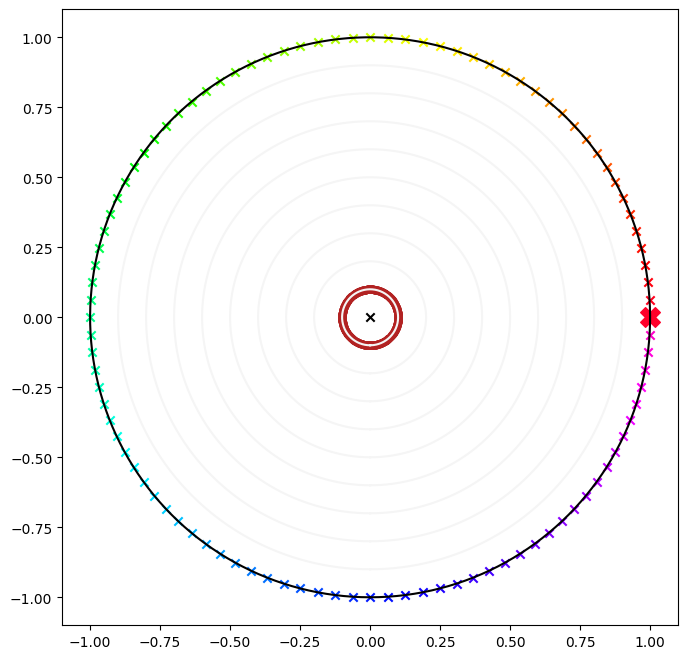

In [89]:
from helper import pmath
from helper.helper import get_optimizer, load_dataset 
from helper.hyperbolicLoss import PeBusePenalty

norm_value = 0.1
# norm_value1 = 0.9
dims = 2
proto_of_interest = 0
f_loss = PeBusePenalty(dims, penalty_option= 'dim', mult= 0.0)
proto_path = f'/Users/dj/Documents/GitHub/Master_Thesis/Code/SynDat_HBL/prototypes/prototypes-{dims}d-100c.npy'
protos = np.load(proto_path)

NUM_COLORS = len(protos)
cm = plt.get_cmap('gist_rainbow')
colors_arr = []
for i in range(NUM_COLORS):
    colors_arr.append(cm(i//1*1.0/NUM_COLORS))

tensors = specific_norm_tensors(d = dims, ten_norm = norm_value)
# tensors1 = specific_norm_tensors(d = dims, ten_norm = norm_value1)

x = [i[0] for i in tensors]
y = [i[1] for i in tensors]

if dims ==2:
    theta = np.linspace(-np.pi, np.pi, 1000)
    x = [np.sin(theta)*norm_value]
    y = [np.cos(theta)*norm_value]
    # x1 = [np.sin(theta)*norm_value1]
    # y1 = [np.cos(theta)*norm_value1]

###################################################### Plot
if dims == 2:
    fig1 = plt.figure(figsize=(15,8))
    ax = plt.axes()
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams["axes.labelweight"] = "bold"

    ax.set_aspect(1)
    theta = np.linspace(-np.pi, np.pi, 200)
    plt.plot(np.sin(theta), np.cos(theta), c = 'black')
    for i in np.arange(0,10,1):
        plt.plot(np.sin(theta)*i/10, np.cos(theta)*i/10,color = 'whitesmoke')

    plt.scatter(x, y, s= 20, color = 'firebrick', label = 'Tensors Norm 0.1')
    # plt.scatter(x1, y1, s= 20, color = 'midnightblue', label = 'Tensors Norm 0.9')
    plt.scatter(0,0, color = 'black', marker = 'x')
    for idx, i in enumerate(protos):
        if idx == proto_of_interest:
            plt.scatter(i[0] , i[1], color = colors_arr[idx], marker = 'X', s = 200)
        else:
            plt.scatter(i[0] , i[1], color = colors_arr[idx], marker = 'x')
##################################################### End plot

# Calculate the loss
complete_losses = []
for j in protos:
    losses = []
    for idx, i in enumerate(tensors):
        sample = i.view(dims,1)
        target = torch.tensor(j).view(dims,1)
        losses.append(f_loss(sample, target).item())
    complete_losses.append(losses)

complete_losses = np.array(complete_losses)


/opt/anaconda3/envs/MasterThesis/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/anaconda3/envs/MasterThesis/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/anaconda3/envs/MasterThesis/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator


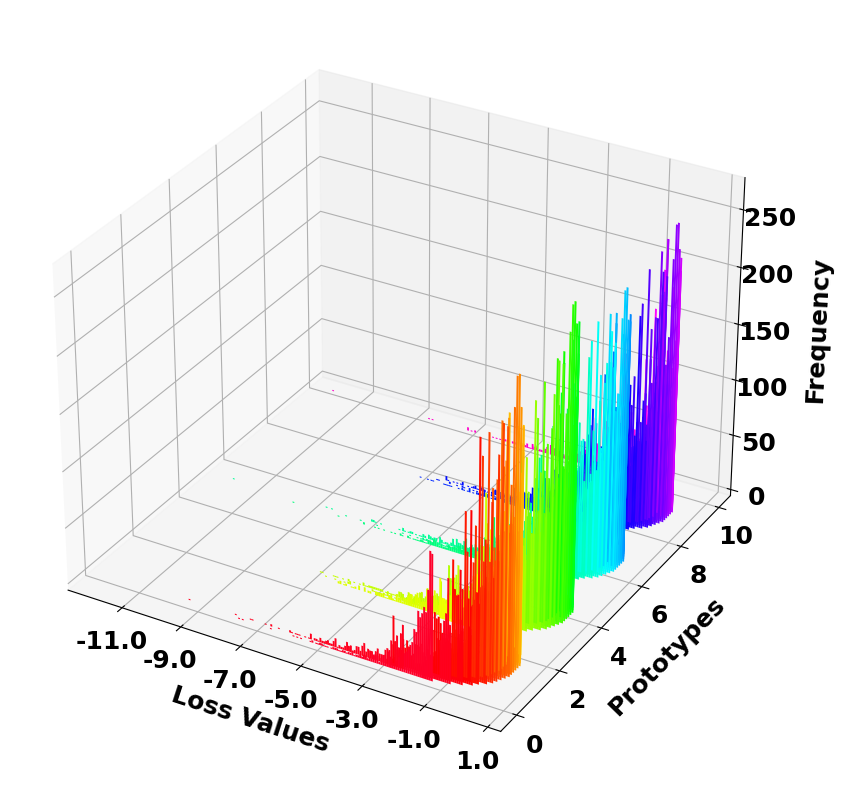

In [90]:
NUM_COLORS = len(complete_losses)
cm = plt.get_cmap('gist_rainbow')
# cm = plt.cm.inferno
colors_arr = []
for i in range(NUM_COLORS):
    colors_arr.append(cm(i//1*1.0/NUM_COLORS))

nbins = 200

#we create evenly spaced bins between the minimum and maximum of the entire dataframe
xbins = np.linspace(complete_losses.min(), complete_losses.max().max(), nbins)
#and calculate the center and widths of the bars
xcenter = np.convolve(xbins, np.ones(2), "valid")/2
xwidth = np.diff(xbins)

z = np.arange(0,len(complete_losses)*10, 10)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
counter = 0

for idx, i in enumerate(complete_losses):
    if -inf in i:
        print(idx, 'Hello there.')
        counter += 1
        pass
    else:
        hist, bins = np.histogram(np.array(i), bins = xbins)
        xs = (bins[:-1] + bins[1:])/2
        ax.bar(left=xcenter, height=hist, width=xwidth, zs= z[idx], zdir='y', color=colors_arr[counter], alpha=1.0)
        counter += 1

text_size = 18
ax.set_xlabel('Loss Values',size = text_size, labelpad=10)
ax.set_ylabel('Prototypes', size = text_size, labelpad=10)
ax.set_yticklabels(np.arange(-2,len(complete_losses)+2,2) , size = text_size)
ax.set_xticklabels(np.arange( np.round(np.min(complete_losses)), np.round(np.max(complete_losses)+2), 2), size = text_size)
ax.set_zticklabels(np.arange(0,300,50) ,size=text_size)
ax.set_zlabel('Frequency', size = text_size, labelpad=15)
# ax.set_title(f'Output Dimension of {dims} and norm value of {norm_value}')
# ax.invert_xaxis()

plt.show()

In [341]:
np.round(np.max(complete_losses),2)

-8.05

In [382]:
np.round(np.arange(-790, -730, 5),2)/100 # 1k 0.1
np.round(np.arange(-780, -720, 10),2)/100 # 1k 0.9

array([-7.9 , -7.85, -7.8 , -7.75, -7.7 , -7.65, -7.6 , -7.55, -7.5 ,
       -7.45, -7.4 , -7.35])

In [15]:
np.arange(np.round(np.max(complete_losses)), np.round(np.min(complete_losses))-2, -2)

array([ -0.,  -2.,  -4.,  -6.,  -8., -10., -12., -14.])

# 2D-Histograms

                 0
count  1000.000000
mean     -1.242326
std       0.246647
min      -1.622251
25%      -1.502734
50%      -1.200458
75%      -1.002028
max      -0.918514


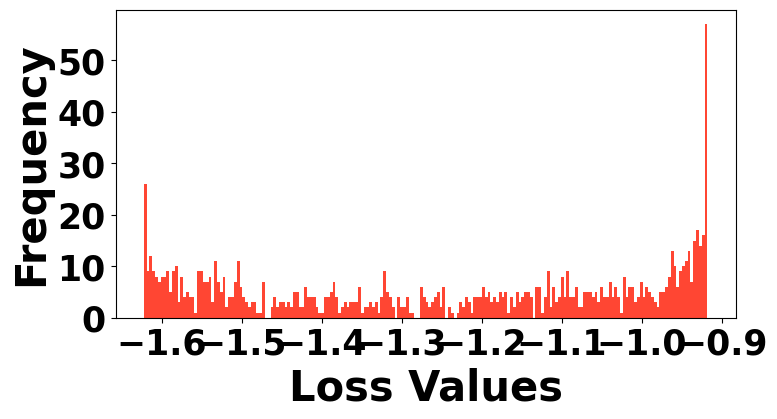

In [93]:
num_bins = 200

NUM_COLORS = len(complete_losses)
cm = plt.get_cmap('gist_rainbow')
colors_arr = []
for i in range(NUM_COLORS):
    colors_arr.append(cm(i//1*1.0/NUM_COLORS))

plt.figure(figsize=(8,4))
interest = [5]

for i in interest:
    plt.hist(complete_losses[i], num_bins,
                                    color =colors_arr[i],
                                    alpha = 0.8)

    
    df_describe = pd.DataFrame(complete_losses[i])
    print(df_describe.describe())
    
plt.xlabel('Loss Values', size= 30); plt.ylabel('Frequency', size = 30)
plt.xticks(size = 25)
plt.yticks(size = 25)
# plt.title('Histogram of the Norm of the Exp. Map Outputs\n\n', fontweight ="bold")
  
plt.show()

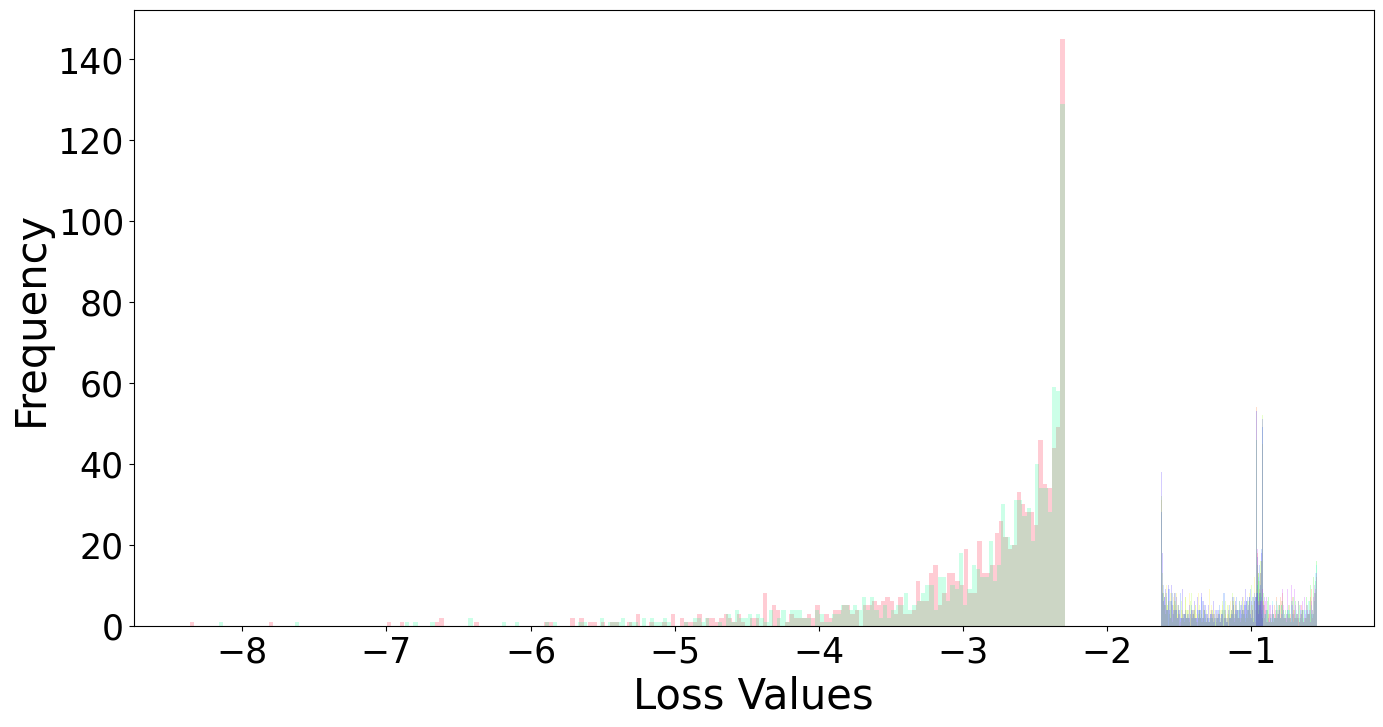

In [252]:
num_bins = 200

NUM_COLORS = len(complete_losses)
cm = plt.get_cmap('gist_rainbow')
colors_arr = []
for i in range(NUM_COLORS):
    colors_arr.append(cm(i//1*1.0/NUM_COLORS))

plt.figure(figsize=(16,8))

for idx, i in enumerate(complete_losses):
    plt.hist(np.array(i), num_bins,
                                color =colors_arr[idx],
                                alpha = 0.2)
   
plt.xlabel('Loss Values', size= 30); plt.ylabel('Frequency', size = 30)
plt.xticks(size = 25)
plt.yticks(size = 25)
# plt.title('Histogram of the Norm of the Exp. Map Outputs\n\n', fontweight ="bold")
  
plt.show() 

# Vanishing Gradients

In [4]:
val = [1,1,1,0,1,0,1,1,1,0,1,6,5,8,8,7,7,12,10,23,23,22,51,50,120,253,616,1507,4346,10729,20055,23719,16028,7498,2799,1129,426,204,104,48,34,39,20,16,12,7,12,8,7,2,2,3,4,1,2,0,3,1,2,0,1,2,0,1]
b = [-0.0010736753865785431,-0.0010382166001363657,-0.0010027578136941884,-0.000967299027252011,-0.0009318402408098336,-0.0008963814543676563,-0.0008609226679254789,-0.0008254638814833015,-0.0007900050950411242,-0.0007545463085989468,-0.0007190875221567694,-0.000683628735714592,-0.0006481699492724147,-0.0006127111628302373,-0.0005772523763880599,-0.0005417935899458826,-0.0005063348035037052,-0.0004708760170615278,-0.00043541723061935045,-0.0003999584441771731,-0.0003644996577349957,-0.00032904087129281834,-0.00029358208485064097,-0.0002581232984084636,-0.00022266451196628623,-0.00018720572552410886,-0.0001517469390819315,-0.00011628815263975412,-0.00008082936619757675,-0.000045370579755399376,-0.000009911793313222006,0.000025546993128955364,0.000061005779571132734,0.0000964645660133101,0.00013192335245548747,0.00016738213889766484,0.00020284092533984222,0.00023829971178201959,0.00027375849822419696,0.0003092172846663743,0.0003446760711085517,0.00038013485755072907,0.00041559364399290644,0.0004510524304350838,0.0004865112168772612,0.0005219700033194385,0.0005574287897616159,0.0005928875762037933,0.0006283463626459707,0.000663805149088148,0.0006992639355303254,0.0007347227219725028,0.0007701815084146801,0.0008056402948568575,0.0008410990812990349,0.0008765578677412122,0.0009120166541833896,0.000947475440625567,0.0009829342270677444,0.0010183930135099217,0.001053851799952099,0.0010893105863942765,0.0011247693728364538,0.0011602281592786312]
labels= np.linspace(0 - len(val)/2 , len(val) - len(val)/2, len(val))

val_c = [1,0,0,0,1,0,1,2,1,5,10,14,24,33,50,87,113,146,231,312,445,697,871,1153,1551,1852,2365,2976,3583,4150,4648,5070,5381,5608,5876,5757,5572,5212,4651,4206,3633,3119,2485,2082,1546,1229,934,693,504,346,224,186,101,86,64,47,19,21,10,8,5,1,1,1]
b_c = [-0.0005608824276350788,-0.0005441836819954915,-0.0005274849363559042,-0.0005107861907163169,-0.0004940874450767296,-0.00047738869943714235,-0.00046068995379755506,-0.0004439912081579678,-0.0004272924625183805,-0.0004105937168787932,-0.0003938949712392059,-0.00037719622559961863,-0.00036049747996003134,-0.00034379873432044405,-0.00032709998868085677,-0.0003104012430412695,-0.0002937024974016822,-0.0002770037517620949,-0.0002603050061225076,-0.00024360626048292033,-0.00022690751484333305,-0.00021020876920374576,-0.00019351002356415847,-0.00017681127792457119,-0.0001601125322849839,-0.0001434137866453966,-0.00012671504100580933,-0.00011001629536622204,-0.00009331754972663475,-0.00007661880408704747,-0.00005992005844746018,-0.00004322131280787289,-0.000026522567168285605,-0.000009823821528698318,0.000006874924110888969,0.000023573669750476256,0.00004027241539006354,0.00005697116102965083,0.00007366990666923812,0.0000903686523088254,0.00010706739794841269,0.00012376614358799998,0.00014046488922758726,0.00015716363486717455,0.00017386238050676184,0.00019056112614634912,0.0002072598717859364,0.0002239586174255237,0.00024065736306511099,0.00025735610870469827,0.00027405485434428556,0.00029075359998387285,0.00030745234562346013,0.0003241510912630474,0.0003408498369026347,0.000357548582542222,0.0003742473281818093,0.00039094607382139657,0.00040764481946098385,0.00042434356510057114,0.00044104231074015843,0.0004577410563797457,0.000474439802019333,0.0004911385476589203]


val_2d  = [1,0,0,0,0,0,0,6,3,6,11,6,16,25,55,58,97,125,185,266,378,528,748,1000,1425,1833,2240,2880,3669,4267,4971,5611,6294,6325,6444,6363,5925,5351,4674,4013,3242,2718,2119,1619,1280,988,633,514,350,245,157,119,67,52,38,19,9,7,7,11,1,1,2,3]
b_2d = [-0.02656711428426206,-0.025769786443561316,-0.02497245860286057,-0.024175130762159824,-0.02337780292145908,-0.022580475080758333,-0.021783147240057588,-0.020985819399356842,-0.020188491558656096,-0.01939116371795535,-0.018593835877254605,-0.01779650803655386,-0.016999180195853114,-0.01620185235515237,-0.015404524514451623,-0.014607196673750877,-0.013809868833050132,-0.013012540992349386,-0.01221521315164864,-0.011417885310947895,-0.01062055747024715,-0.009823229629546404,-0.009025901788845658,-0.008228573948144913,-0.007431246107444167,-0.0066339182667434216,-0.005836590426042676,-0.00503926258534193,-0.004241934744641185,-0.0034446069039404392,-0.0026472790632396936,-0.001849951222538948,-0.0010526233818382025,-0.0002552955411374569,0.0005420322995632887,0.0013393601402640343,0.00213668798096478,0.0029340158216655254,0.003731343662366271,0.004528671503067017,0.005325999343767762,0.006123327184468508,0.006920655025169253,0.007717982865869999,0.008515310706570745,0.00931263854727149,0.010109966387972236,0.010907294228672981,0.011704622069373727,0.012501949910074472,0.013299277750775218,0.014096605591475964,0.01489393343217671,0.015691261272877455,0.0164885891135782,0.017285916954278946,0.01808324479497969,0.018880572635680437,0.019677900476381183,0.020475228317081928,0.021272556157782674,0.02206988399848342,0.022867211839184165,0.02366453967988491]

In [5]:
print(len(b))
print(len(val))
print(len(labels))

print(len(b_c))
print(len(val_c))

print(len(val_2d))
print(len(b_2d))

64
64
64
64
64
64
64


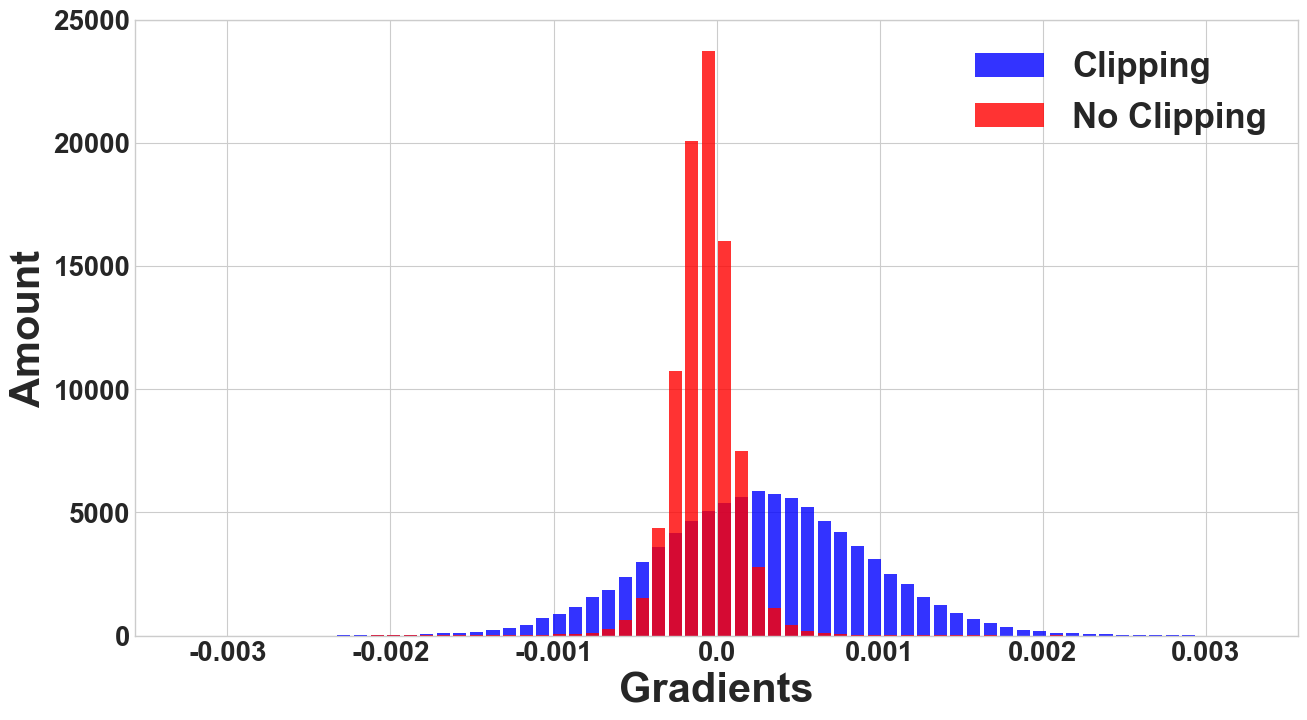

In [33]:
style.use('seaborn-whitegrid') 
fig = plt.figure(figsize=(15,8))
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.bar(labels, val_c, color= 'blue', alpha = 0.8) # With clipping
plt.bar(labels, val, color= 'red', alpha = 0.8) # NO clipping
# plt.bar(labels, val_2d, color= 'green', alpha = 0.8) # Clipping 2d
plt.xticks(ticks = [-30, -20, -10, 0, 10, 20 ,30], labels = [-0.003, -0.002, - 0.001, 0.000, 0.001, 0.002, 0.003], size = 20)
plt.yticks([0,5000, 10000, 15000, 20000, 25000], size = 20)
plt.xlabel('Gradients', size = 30)
plt.ylabel('Amount', size = 30)
plt.legend(['Clipping', 'No Clipping'], prop={'size': 25})

In [16]:
for id, i in enumerate(b):
    if id == 0:
        continue
    else:
        if b[id-1] > b[id]:
            print('Yes')

In [200]:
print(min(b))
print(max(b))

print(min(b_c))
print(max(b_c))

-0.0011091341730207205
0.0011602281592786312
-0.0005775811732746661
0.0004911385476589203


# Prototypes Exploration

In [105]:
import numpy as np
import torch
import torch.nn.functional as F
import torch.optim as optim
from torch import nn

def prototype_loss(prototype):
    # Dot product of normalized prototypes is cosine similarity.
    product = torch.matmul(prototype, prototypes.t()) + 1
    # Remove diagnonal from loss.
    product -= 2. * torch.diag(torch.diag(product))
    # Minimize maximum cosine similarity.
    loss = product.max(dim=1)[0]

    return loss.mean(), product.max()


def prototype_unify(num_classes):
    single_angle = 2 * math.pi / num_classes
    help_list = np.array(range(0, num_classes))
    angles = (help_list * single_angle).reshape(-1, 1)

    sin_points = np.sin(angles)
    cos_points = np.cos(angles)

    set_prototypes = torch.tensor(np.concatenate((cos_points, sin_points), axis=1))
    return set_prototypes

#
# Compute the semantic relation loss.
#
def prototype_loss_sem(prototypes, triplets):
    product = torch.matmul(prototypes, prototypes.t()) + 1
    product -= 2. * torch.diag(torch.diag(product))
    loss1 = -product[triplets[:, 0], triplets[:, 1]]
    loss2 = product[triplets[:, 2], triplets[:, 3]]
    # return loss1.mean() + loss2.mean(), product.max()
    return loss1.mean() + loss2.mean()

classes = 1000
dims = 1000
learning_rate = 1e-3
momentum = 0.9
epochs = 10
use_wtv = False
triplets = None

# First Randomly Initialize Prototypes.
prototypes = torch.randn(classes, dims)
prototypes = nn.Parameter(F.normalize(prototypes, p=2, dim=1))
print('initializing finished.')

optimizer = optim.SGD([prototypes], lr=learning_rate, momentum=momentum)

if dims > 2:
    # Optimize for separation.
    for i in range(epochs):
        # Compute loss.
        loss1, _ = prototype_loss(prototypes)
        if use_wtv:
            loss2 = prototype_loss_sem(prototypes, triplets)
            loss = loss1 + loss2
        else:
            loss = loss1
        # Update.
        loss.backward()
        optimizer.step()
        # Normalize prototypes again
        prototypes = nn.Parameter(F.normalize(prototypes, p=2, dim=1))
        optimizer = optim.SGD([prototypes], lr=learning_rate,
                                momentum=momentum)

elif dims == 2:
    prototypes = prototype_unify(classes)
    prototypes = nn.Parameter(F.normalize(prototypes, p=2, dim=1))

else:
    raise Exception('Dimension is not correct.')


initializing finished.


In [106]:
prototypes

Parameter containing:
tensor([[-0.0046,  0.0273,  0.0214,  ...,  0.0183, -0.0165, -0.0383],
        [ 0.0157,  0.0245, -0.0148,  ...,  0.0247, -0.0067,  0.0406],
        [ 0.0276,  0.0631, -0.0381,  ..., -0.0136, -0.0201, -0.0162],
        ...,
        [-0.0184, -0.0532,  0.0336,  ..., -0.0488,  0.0112,  0.0308],
        [-0.0244, -0.0208,  0.0182,  ..., -0.0344, -0.0437, -0.0016],
        [-0.0023, -0.0076, -0.0274,  ..., -0.0311,  0.0507, -0.0113]],
       requires_grad=True)

/opt/anaconda3/envs/MasterThesis/lib/python3.7/site-packages/numpy/ma/core.py:2830: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  order=order, subok=True, ndmin=ndmin)
/opt/anaconda3/envs/MasterThesis/lib/python3.7/site-packages/numpy/ma/core.py:2830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  order=order, subok=True, ndmin=ndmin)


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

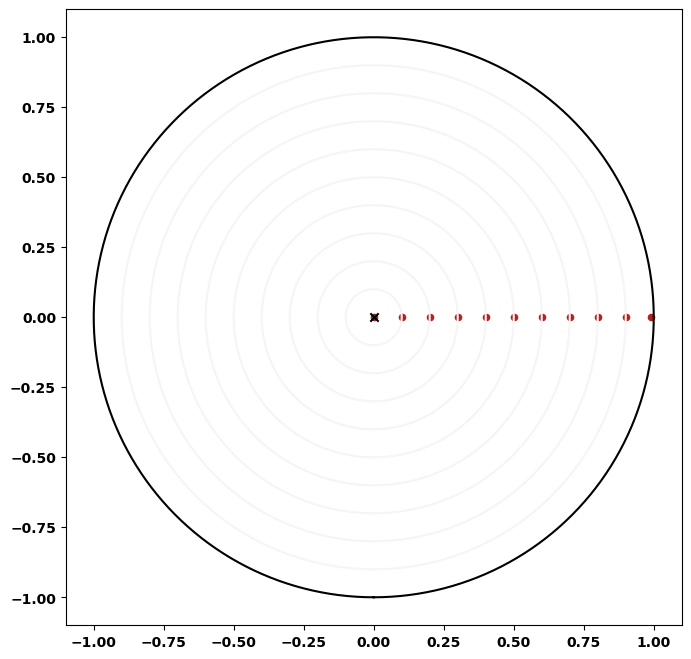

In [107]:
proto_of_interest = 4

fig1 = plt.figure(figsize=(15,8))
ax = plt.axes()
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

ax.set_aspect(1)
theta = np.linspace(-np.pi, np.pi, 200)
plt.plot(np.sin(theta), np.cos(theta), c = 'black')
for i in np.arange(0,10,1):
    plt.plot(np.sin(theta)*i/10, np.cos(theta)*i/10,color = 'whitesmoke')

plt.scatter(x, y, s= 20, color = 'firebrick', label = 'Tensors Norm 0.1')
plt.scatter(0,0, color = 'black', marker = 'x')
for idx, i in enumerate(prototypes):
    if idx == proto_of_interest:
        plt.scatter(i[0] , i[1], marker = '*')
    else:
        plt.scatter(i[0] , i[1], marker = 'x')

In [108]:
dims = 1000
f_loss = PeBusePenalty(dims, penalty_option= 'dim', mult= 0.0)
r = torch.arange(0, 1.1 ,0.1)
for idx, i in enumerate(np.arange(0, len(r), 1)): # Amount of samples

    # Data
    t = torch.zeros(dims).view(dims,1)
    t[0] = r[i]
    if i == 10:
        t[0] = t[0] - 0.01

    # # Prototype
    # target = torch.zeros(dims).view(dims,1)
    # target[0] = 1.0 - 1e-6
    # target += 1e-6 # otherwise, the only solution is -inf 
    # if idx == 10:
    #     print(target)


    target = torch.tensor(prototypes[0]) # if one wants to have the regular target
    # if idx == 10:
    #     print(target)

    # Loss
    print(f_loss(t, target).item())

    # if i == 10:
    #     print(t.view(dims), target.view(dims), f_loss(t, target).item())
# print('Target:', target)

-9.536742027194123e-07
0.0023840651847422123
0.003741202875971794
0.004595962353050709
0.005248590372502804
0.005807201378047466
0.0063300589099526405
0.006865272298455238
0.00748060829937458
0.008355269208550453
0.010802189819514751


/opt/anaconda3/envs/MasterThesis/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


# Investigating the shape of the target

In [28]:
def csv_torch(df):

    # Creating Tuples
    cols = df.columns
    rows = np.unique(df.index)
    samps = []

    for i in rows:
        s  = df.loc[int(i),:]
        for j in cols:
            t = torch.Tensor(np.array(s[str(j)]))
            tup = (t, int(i))
            samps.append(tup)
    random.shuffle(samps)
    return samps

In [32]:
import pandas as pd
import numpy as np
import pandas as pd
import torch
import torch.optim as optim
import torch.utils.data as data
from torchvision import datasets, transforms
import random

basedir = '/Users/dj/Documents/GitHub/Master_Thesis/Code/SynDat_HBL/data/'
basedir += "syndat/"

path_train = basedir +  ("/%dc%dd%ds_train.csv" % (10, 300, 1000))
path_test = basedir +  ("/%dc%dd%ds_test.csv" % (10, 300, 1000))
train = pd.read_csv(path_train, index_col=0)
test = pd.read_csv(path_test, index_col=0)

dat_train = csv_torch(train)
dat_test = csv_torch(test)

trainloader = torch.utils.data.DataLoader(dat_train, batch_size = 200)
testloader = torch.utils.data.DataLoader(dat_test, batch_size = 200)

In [41]:
proto_path = f'/Users/dj/Documents/GitHub/Master_Thesis/Code/SynDat_HBL/prototypes/prototypes-10d-10c.npy'
protos = np.load(proto_path)


(10, 10)

In [56]:
for bidx, (data, target) in enumerate(trainloader):
    target_final = protos[target]
    test = (target_final).reshape(200,10,1)
    print(test[0].shape)
    # print(target_final[0].reshape(len(target_final[0]), 1))
    break

(10, 1)
